In [100]:
#MOCK EXAM Cereals

In [101]:
#Import librairies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [102]:
# Question 1) Import & Data Manipulation

In [103]:
# a) importing

In [104]:
df = pd.read_excel("cereal_data.xls")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Corn Chex,R,C,110.0,2.0,0.0,280.0,0.0,22.0,3.0,25.0,25.0,1.0,1.0,1.0,41.445019
1,Corn Flakes,K,C,100.0,2.0,0.0,290.0,1.0,21.0,2.0,35.0,25.0,1.0,1.0,1.0,45.863324
2,Rice Krispies,K,C,110.0,2.0,0.0,290.0,0.0,22.0,3.0,35.0,25.0,1.0,1.0,1.0,40.560159
3,Special K,K,NaN,110.0,6.0,0.0,230.0,1.0,16.0,3.0,55.0,25.0,1.0,1.0,1.0,53.131324
4,Multi-Grain Cheerios,G,C,100.0,2.0,1.0,220.0,2.0,15.0,6.0,90.0,25.0,1.0,1.0,1.0,40.105965


In [105]:
df.shape

(77, 16)

In [106]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,75.000000,76.000000,75.000000,75.000000,75.000000,76.000000,76.000000,76.000000,74.000000,76.000000,77.000000
mean,106.842105,2.539474,1.013333,159.671053,2.156000,14.600000,6.933333,96.092105,28.289474,2.210526,1.030811,0.821316,42.665705
std,19.610237,1.100797,1.019981,84.389318,2.415224,4.335585,4.503252,71.760375,22.487813,0.837708,0.153416,0.234250,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,128.750000,0.500000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,2.500000,1.000000,180.000000,1.500000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [107]:
df.dtypes

name         object
mfr          object
type         object
calories    float64
protein     float64
fat         float64
sodium      float64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins    float64
shelf       float64
weight      float64
cups        float64
rating      float64
dtype: object

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       73 non-null     object 
 2   type      71 non-null     object 
 3   calories  76 non-null     float64
 4   protein   76 non-null     float64
 5   fat       75 non-null     float64
 6   sodium    76 non-null     float64
 7   fiber     75 non-null     float64
 8   carbo     75 non-null     float64
 9   sugars    75 non-null     float64
 10  potass    76 non-null     float64
 11  vitamins  76 non-null     float64
 12  shelf     76 non-null     float64
 13  weight    74 non-null     float64
 14  cups      76 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(13), object(3)
memory usage: 9.8+ KB


In [109]:
# b) cleaning data 

In [110]:
df.isnull().sum()

name        0
mfr         4
type        6
calories    1
protein     1
fat         2
sodium      1
fiber       2
carbo       2
sugars      2
potass      1
vitamins    1
shelf       1
weight      3
cups        1
rating      0
dtype: int64

In [111]:
# Select only qualitative columns
cat_columns = df.select_dtypes(include='object').columns.tolist()

cat_columns

['name', 'mfr', 'type']

In [112]:
# Select only quantitative columns
num_columns = df.select_dtypes(include='number').columns.tolist()

num_columns

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'shelf',
 'weight',
 'cups',
 'rating']

In [113]:
# clean the qualitative columns
for col in cat_columns:
     df[col].fillna(df[col].mode()[0], inplace=True)

In [114]:
MFR = df["mfr"].unique()
MFR

array(['R', 'K', 'G', 'N', 'Q', 'A', 'P'], dtype=object)

In [115]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    1
protein     1
fat         2
sodium      1
fiber       2
carbo       2
sugars      2
potass      1
vitamins    1
shelf       1
weight      3
cups        1
rating      0
dtype: int64

In [116]:
# clean the quantitative columns by mfr

for col in  num_columns : 
  
    for m in MFR :
        
        dfm = df.loc[(df['mfr']== m)]
    
        df.loc[(df['mfr']== m) & (df[col].isnull()), col]=dfm[col].mean()
       

In [117]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      1
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [118]:
df[12:20]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
12,Lucky Charms,G,C,110.0,2.0,1.0,180.0,0.000000,12.0,12.0,55.0,25.0,2.0,1.0,1.0,26.734515
13,Cocoa Puffs,G,C,110.0,1.0,1.0,180.0,0.000000,12.0,13.0,55.0,25.0,2.0,1.0,1.0,22.736446
14,Count Chocula,G,C,110.0,1.0,1.0,180.0,0.000000,12.0,13.0,65.0,25.0,2.0,1.0,1.0,22.396513
15,Strawberry Fruit Wheats,N,C,90.0,2.0,0.0,15.0,3.000000,15.0,5.0,90.0,25.0,2.0,1.0,1.0,59.363993
16,Maypo,A,H,100.0,4.0,1.0,0.0,0.000000,16.0,3.0,NaN,25.0,2.0,1.0,1.0,54.850917
17,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,1.242857,8.0,8.0,135.0,0.0,3.0,1.0,1.0,33.983679
18,Crispix,G,C,110.0,2.0,0.0,220.0,1.000000,21.0,3.0,30.0,25.0,3.0,1.0,1.0,46.895644
19,Nutri-grain Wheat,K,C,90.0,3.0,0.0,170.0,3.000000,18.0,2.0,90.0,25.0,3.0,1.0,1.0,59.642837


In [119]:
# Clean the potas column by the column mean 
df.potass = df.potass.fillna(df.potass.mean())
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [120]:
# changing null values for protein 
for b in MFR:
    df_b = df[df["mfr"]== b]
    avg_b = df_b["protein"].mean()
    df.loc[(df["mfr"]== b) & (df['protein'].isnull()), 'protein']=avg_b

In [121]:
# changing null values for calories 
for c in MFR:
    df_c = df[df["mfr"]== c]
    avg_c = df_c["calories"].mean()
    df.loc[(df["mfr"]== c) & (df['calories'].isnull()), 'calories']=avg_c

In [122]:
# changing null values for fat 
for d in MFR:
    df_d = df[df["mfr"]== d]
    avg_d = df_d["fat"].mean()
    df.loc[(df["mfr"]== d) & (df['fat'].isnull()), 'fat']=avg_d

In [123]:
# changing null values for sodium 
for e in MFR:
    df_e = df[df["mfr"]== e]
    avg_e = df_e["sodium"].mean()
    df.loc[(df["mfr"]== e) & (df['sodium'].isnull()), 'sodium']=avg_e

In [124]:
# changing null values for fiber
for f in MFR:
    df_f = df[df["mfr"]== f]
    avg_f = df_d["fiber"].mean()
    df.loc[(df["mfr"]== f) & (df['fiber'].isnull()), 'fiber']=avg_f

In [125]:
# changing null values for carbo
for g in MFR:
    df_g = df[df["mfr"]== g]
    avg_g = df_d["carbo"].mean()
    df.loc[(df["mfr"]== g) & (df['carbo'].isnull()), 'carbo']=avg_g

In [126]:
# changing null values for sugars 
for h in MFR:
    df_h = df[df["mfr"]== h]
    avg_h = df_h["sugars"].mean()
    df.loc[(df["mfr"]== h) & (df['sugars'].isnull()), 'sugars']=avg_h

In [127]:
# changing null values for potass 
for i in MFR:
    df_i = df[df["mfr"]== i]
    avg_i = df_d["potass"].mean()
    df.loc[(df["mfr"]== i) & (df['potass'].isnull()), 'potass']=avg_i

In [128]:
# changing null values for vitamins 
for j in MFR:
    df_j = df[df["mfr"]== j]
    avg_j = df_j["vitamins"].mean()
    df.loc[(df["mfr"]== j) & (df['vitamins'].isnull()), 'vitamins']=avg_j

In [129]:
# changing null values for shelf 
for k in MFR:
    df_k = df[df["mfr"]== k]
    avg_k = df_d["shelf"].mean()
    df.loc[(df["mfr"]== k) & (df['shelf'].isnull()), 'shelf']=avg_k

In [130]:
# changing null values for weight 
for l in MFR:
    df_l = df[df["mfr"]== l]
    avg_l = df_l["weight"].mean()
    df.loc[(df["mfr"]== l) & (df['weight'].isnull()), 'weight']=avg_l

In [131]:
# changing null values for cups  
for m in MFR:
    df_m = df[df["mfr"]== m]
    avg_m = df_m["cups"].mean()
    df.loc[(df["mfr"]== m) & (df['cups'].isnull()), 'cups']=avg_m

In [132]:
mean_mfr_sodium = df.groupby('mfr').mean("sodium")

In [133]:
mean_mfr_sodium

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
A,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,96.092105,25.000000,2.000000,1.000000,1.000000,54.850917
G,112.307692,2.360000,1.230769,192.692308,1.500000,15.115385,7.923077,90.000000,36.538462,2.192308,1.068400,0.870000,36.140778
K,106.842105,2.631579,0.611111,180.000000,2.777778,14.705882,7.647059,100.263158,33.333333,2.333333,1.061053,0.790000,43.784902
N,86.666667,2.833333,0.000000,37.500000,4.000000,16.000000,1.833333,120.666667,8.333333,1.666667,0.971667,0.778333,67.968567
P,108.888889,2.444444,0.888889,144.375000,2.777778,13.222222,8.777778,113.888889,25.000000,2.444444,1.064444,0.714444,41.705744
Q,95.000000,2.625000,1.750000,92.500000,1.242857,10.000000,5.250000,74.375000,12.500000,2.375000,0.875000,0.823750,42.915990
R,115.714286,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.250000,25.000000,2.000000,1.000000,0.871250,41.542997


In [134]:
# C) Data Manipulation

In [135]:
df.head(6)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Corn Chex,R,C,110.0,2.0,0.0,280.0,0.0,22.0,3.0,25.0,25.0,1.0,1.0000,1.0,41.445019
1,Corn Flakes,K,C,100.0,2.0,0.0,290.0,1.0,21.0,2.0,35.0,25.0,1.0,1.0000,1.0,45.863324
2,Rice Krispies,K,C,110.0,2.0,0.0,290.0,0.0,22.0,3.0,35.0,25.0,1.0,1.0000,1.0,40.560159
3,Special K,K,C,110.0,6.0,0.0,230.0,1.0,16.0,3.0,55.0,25.0,1.0,1.0000,1.0,53.131324
4,Multi-Grain Cheerios,G,C,100.0,2.0,1.0,220.0,2.0,15.0,6.0,90.0,25.0,1.0,1.0000,1.0,40.105965
5,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,1.0684,1.0,51.592193


In [136]:
df.tail(6)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
71,Golden Crisp,P,C,100.000000,2.0,0.0,45.0,0.0,11.0,15.0,40.0,25.0,1.0,1.0,0.88,35.252444
72,Grape Nuts Flakes,P,C,100.000000,3.0,1.0,140.0,3.0,15.0,5.0,85.0,25.0,3.0,1.0,0.88,52.076897
73,Rice Chex,R,C,115.714286,1.0,0.0,240.0,0.0,23.0,2.0,30.0,25.0,1.0,1.0,1.13,41.998933
74,Cheerios,G,C,110.000000,6.0,2.0,290.0,2.0,17.0,1.0,105.0,25.0,1.0,1.0,1.25,50.764999
75,Honey-comb,P,C,110.000000,1.0,0.0,180.0,0.0,14.0,11.0,35.0,25.0,1.0,1.0,1.33,28.742414
76,Kix,G,C,110.000000,2.0,1.0,260.0,0.0,21.0,3.0,40.0,25.0,2.0,1.0,1.50,39.241114


In [137]:
min_cal = df['calories'].min()
min_cal

50.0

In [138]:
result = df[df['calories'] == min_cal]
result

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
26,Puffed Rice,Q,C,50.0,1.0,0.0,0.0,0.0,13.0,0.0,15.0,0.000000,3.0,0.5,1.0,60.756112
27,Puffed Wheat,Q,C,50.0,2.0,0.0,0.0,1.0,10.0,0.0,50.0,0.000000,3.0,0.5,1.0,63.005645
39,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,33.333333,3.0,1.0,0.5,93.704912


In [139]:
#Find the Minimum "calories'" cereal name 

In [140]:
#Find the Minimum "calories'" cereal name 
df_min_cal = df[df["calories"]== df["calories"].min()][["name", "calories"]]
df_min_cal

,name,calories
26,Puffed Rice,50.0
27,Puffed Wheat,50.0
39,All-Bran with Extra Fiber,50.0


In [141]:
#  Print the list of ceral name with Sugars rate = 0 
df_sug_0 = df[df["sugars"] == 0][["name", "sugars"]]
df_sug_0

,name,sugars
6,Cream of Wheat (Quick),0.0
26,Puffed Rice,0.0
27,Puffed Wheat,0.0
28,Shredded Wheat,0.0
39,All-Bran with Extra Fiber,0.0
42,Shredded Wheat spoon size,0.0
43,Shredded Wheat 'n'Bran,0.0


In [142]:
df[df['sugars'] == 0][[ 'name', 'calories', 'sugars']]

,name,calories,sugars
6,Cream of Wheat (Quick),100.0,0.0
26,Puffed Rice,50.0,0.0
27,Puffed Wheat,50.0,0.0
28,Shredded Wheat,80.0,0.0
39,All-Bran with Extra Fiber,50.0,0.0
42,Shredded Wheat spoon size,90.0,0.0
43,Shredded Wheat 'n'Bran,90.0,0.0


In [143]:
df[   (df['calories'] > df['calories'].mean()  )
                                                 ]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Corn Chex,R,C,110.000000,2.0,0.0,280.000,0.000000,22.000000,3.000000,25.0,25.0,1.000000,1.00,1.00,41.445019
2,Rice Krispies,K,C,110.000000,2.0,0.0,290.000,0.000000,22.000000,3.000000,35.0,25.0,1.000000,1.00,1.00,40.560159
3,Special K,K,C,110.000000,6.0,0.0,230.000,1.000000,16.000000,3.000000,55.0,25.0,1.000000,1.00,1.00,53.131324
7,Corn Pops,K,C,110.000000,1.0,0.0,90.000,1.000000,13.000000,12.000000,20.0,25.0,2.000000,1.00,1.00,35.782791
8,Trix,G,C,110.000000,1.0,1.0,140.000,0.000000,13.000000,12.000000,25.0,25.0,2.000000,1.00,1.00,27.753301
9,Froot Loops,K,C,110.000000,2.0,1.0,125.000,1.000000,11.000000,13.000000,30.0,25.0,2.000000,1.00,1.00,32.207582
10,Apple Jacks,K,C,110.000000,2.0,0.0,125.000,1.000000,11.000000,14.000000,30.0,25.0,2.333333,1.00,1.00,33.174094
11,Honey Graham Ohs,Q,C,120.000000,1.0,2.0,220.000,1.000000,12.000000,11.000000,45.0,25.0,2.000000,1.00,1.00,21.871292
12,Lucky Charms,G,C,110.000000,2.0,1.0,180.000,0.000000,12.000000,12.000000,55.0,25.0,2.000000,1.00,1.00,26.734515
13,Cocoa Puffs,G,C,110.000000,1.0,1.0,180.000,0.000000,12.000000,13.000000,55.0,25.0,2.000000,1.00,1.00,22.736446


In [144]:
#Print the list of cereal name with the following four (4) conditions:
#- Calories rate > mean and Protein rate > mean
#- Carbo rate < mean and Potass rate < mean


In [145]:
df_4cond  =    df[    (df['calories'] > df['calories'].mean()        ) 
                    & (df['protein'] >  df['protein'].mean()         )
                    & (df['carbo'] < df['carbo'].mean()              )
                    & (df['potass'] < df['potass'].mean()            )    ]

df_4cond

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Honey Nut Cheerios,G,C,110.0,3.0,1.0,250.0,1.5,11.5,10.0,90.0,25.0,1.0,1.0,0.75,31.072217


In [146]:
# Print the Minimum of " Vitamins_Rate & sodium_Rate" by Cereal Type

Minvs = pd.pivot_table(df,
                         values=['vitamins', 'sodium'],
                         index=['type'], 
                         aggfunc={'vitamins': 'max', 'sodium': 'min'}).reset_index()
Minvs

,type,sodium,vitamins
0,C,0.0,100.0
1,H,0.0,25.0


In [147]:
Minvs['vitamins'].tolist()

[100.0, 25.0]

In [148]:
#Print the Minimum of " Vitamins_Rate & sodium_Rate" by Cereal Type
df.groupby('type')[['vitamins', 'sodium']].min().reset_index()

,type,vitamins,sodium
0,C,0.0,0.0
1,H,0.0,0.0


In [149]:
##### # Print the Mean of " Vitamins_Rate & sodium_Rate" by ( Cereal Type & mfr ) 

MeanVS = pd.pivot_table(df, 
                        values=['vitamins', 'sodium'], 
                        index=['type', 'mfr']).reset_index()
MeanVS

,type,mfr,sodium,vitamins
0,C,G,192.692308,36.538462
1,C,K,180.000000,33.333333
2,C,N,29.000000,10.000000
3,C,P,144.375000,25.000000
4,C,Q,105.714286,14.285714
5,C,R,198.125000,25.000000
6,H,A,0.000000,25.000000
7,H,N,80.000000,0.000000
8,H,Q,0.000000,0.000000


In [150]:
#Print the Mean of " Vitamins_Rate & sodium_Rate" by (Cereal Type & mfr )
www = df.groupby(['type', 'mfr'])[['vitamins', 'sodium']].mean().reset_index()
www

,type,mfr,vitamins,sodium
0,C,G,36.538462,192.692308
1,C,K,33.333333,180.000000
2,C,N,10.000000,29.000000
3,C,P,25.000000,144.375000
4,C,Q,14.285714,105.714286
5,C,R,25.000000,198.125000
6,H,A,25.000000,0.000000
7,H,N,0.000000,80.000000
8,H,Q,0.000000,0.000000


In [151]:
#Using a loop (for ... in ...) to select a column name from a list of columns:
#Print the list of cereal names with Min and the Max of each column.

for cols in  num_columns: 
    print('----------------')
    print('list of min ', cols)
    
    list_min_cols  = df.loc[df[cols]== df[cols].min() ]
    list_min  = list_min_cols[["name", cols]]
    print(list_min)
    
    print('----------------')
    print('list of max ', cols) 
    list_max_cols = df.loc[df[cols]== df[cols].max()]
    list_max = list_max_cols[["name", cols]]
    print(list_max)

----------------
list of min  calories
                         name  calories
26                Puffed Rice      50.0
27               Puffed Wheat      50.0
39  All-Bran with Extra Fiber      50.0
----------------
list of max  calories
                    name  calories
53  Mueslix Crispy Blend     160.0
----------------
list of min  protein
                     name  protein
7               Corn Pops      1.0
8                    Trix      1.0
11       Honey Graham Ohs      1.0
13            Cocoa Puffs      1.0
14          Count Chocula      1.0
26            Puffed Rice      1.0
54         Frosted Flakes      1.0
58         Fruity Pebbles      1.0
59           Cap'n'Crunch      1.0
61  Cinnamon Toast Crunch      1.0
62         Golden Grahams      1.0
73              Rice Chex      1.0
75             Honey-comb      1.0
----------------
list of max  protein
         name  protein
3   Special K      6.0
74   Cheerios      6.0
----------------
list of min  fat
                       

In [152]:
 print('\033[1m','Column: ', col, ' \033[0m')

 Column:  rating  


In [153]:
# ALL METHODS AND TECHNICS

# Using a loop (for ... in ...) to select a column name from a list of columns:
for col in df.columns:
    print('\033[1m','Column: ', col, ' \033[0m')
    print('Min: ', df[col].min())
    print('Max: ', df[col].max())
    print('--------------------------')

 Column:  name  
Min:  100% Bran
Max:  Wheaties Honey Gold
--------------------------
 Column:  mfr  
Min:  A
Max:  R
--------------------------
 Column:  type  
Min:  C
Max:  H
--------------------------
 Column:  calories  
Min:  50.0
Max:  160.0
--------------------------
 Column:  protein  
Min:  1.0
Max:  6.0
--------------------------
 Column:  fat  
Min:  0.0
Max:  5.0
--------------------------
 Column:  sodium  
Min:  0.0
Max:  320.0
--------------------------
 Column:  fiber  
Min:  0.0
Max:  14.0
--------------------------
 Column:  carbo  
Min:  -1.0
Max:  23.0
--------------------------
 Column:  sugars  
Min:  -1.0
Max:  15.0
--------------------------
 Column:  potass  
Min:  -1.0
Max:  330.0
--------------------------
 Column:  vitamins  
Min:  0.0
Max:  100.0
--------------------------
 Column:  shelf  
Min:  1.0
Max:  3.0
--------------------------
 Column:  weight  
Min:  0.5
Max:  1.5
--------------------------
 Column:  cups  
Min:  0.25
Max:  1.5
-----------------

In [154]:
#Question 2 Data Visualisation 


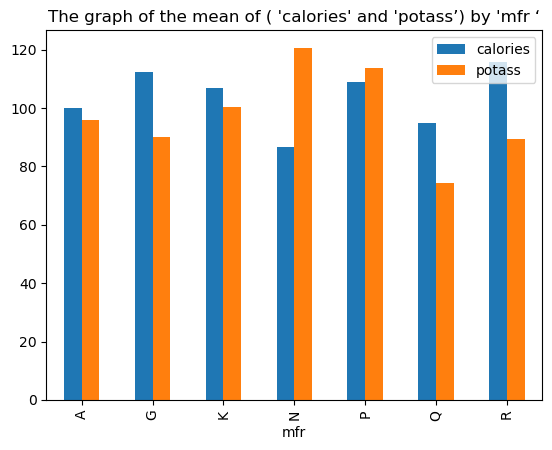

In [155]:
Mean_cp = pd.pivot_table(df, 
             values=['calories', 'potass'],
             index=['mfr']).reset_index()

Mean_cp.plot(x='mfr', y=['calories', 'potass'], kind='bar' )

plt.title("The graph of the mean of ( 'calories' and 'potass’) by 'mfr ‘")

plt.show()

In [156]:
int(len(df.mfr.unique()))

7

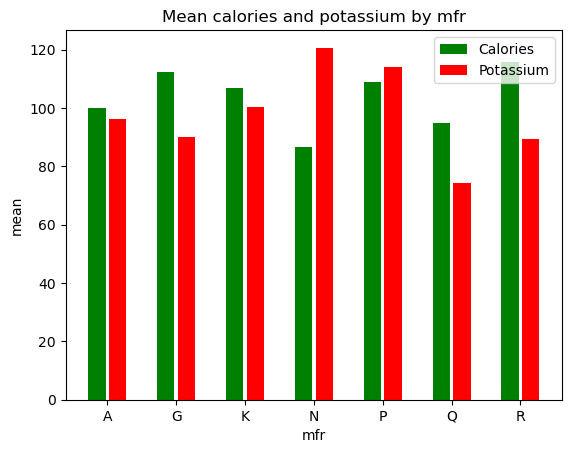

In [157]:
#The graph of the mean of ( 'calories' and 'potass’) by 'mrf ‘
bars= int(len(df.mfr.unique()))
df_means = df.groupby('mfr')[['calories', 'potass']].agg('mean').reset_index()
plt.bar([x - 0.15 for x in range(bars)], df_means['calories'], color = 'g', width = - 0.25, label = 'Calories')
plt.bar([x + 0.15 for x in range(bars)], df_means['potass'], color = 'r', width = 0.25, label = 'Potassium')
plt.xlabel('mfr')
plt.ylabel('mean')
plt.legend()
plt.title('Mean calories and potassium by mfr')
plt.xticks(range(bars),df_means['mfr'])
plt.show()

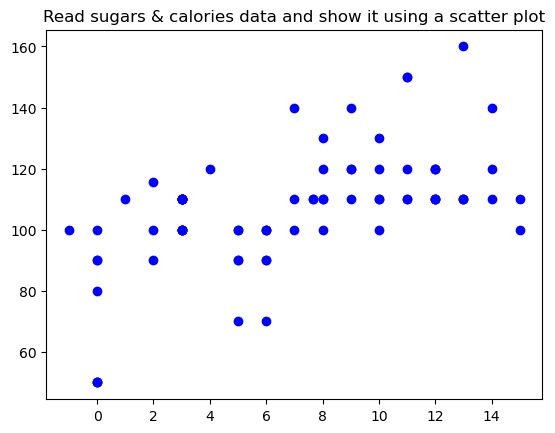

In [158]:
x = df['sugars']
y = df['calories']

plt.scatter(x, y, color = 'b')
plt.title('Read sugars & calories data and show it using a scatter plot')
plt.show()

<BarContainer object of 7 artists>

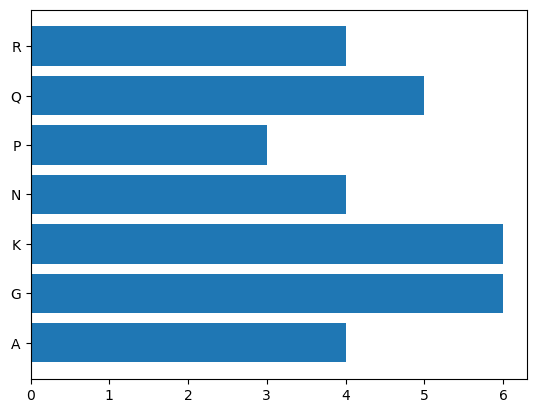

In [159]:
# In Horizontal bar chart display the max of 'Protein ' per 'mfr'.

Maxp = pd.pivot_table(df, values=['protein'], index=['mfr'], aggfunc=np.max).reset_index()
plt.barh(Maxp['mfr'], Maxp['protein'])


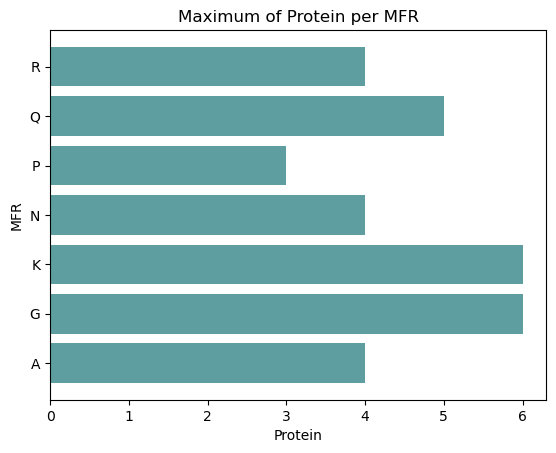

In [160]:
# Horizontal bar chart display the max of 'Protein ' per 'mfr'.
df_max = df.groupby('mfr')['protein'].agg('max').reset_index()
plt.barh(df_max['mfr'], df_max['protein'], color = 'cadetblue')

plt.title('Maximum of Protein per MFR')
plt.xlabel('Protein')
plt.ylabel('MFR')
plt.show()

In [161]:
pd.pivot_table(df, 
                      values=['fat', 'fiber', 'cups', 'weight'], 
                      index=['type'])

,cups,fat,fiber,weight
type,,,,
C,0.819189,0.994745,2.189468,1.031735
H,0.890000,1.000000,1.233333,1.000000


<Axes: xlabel='type'>

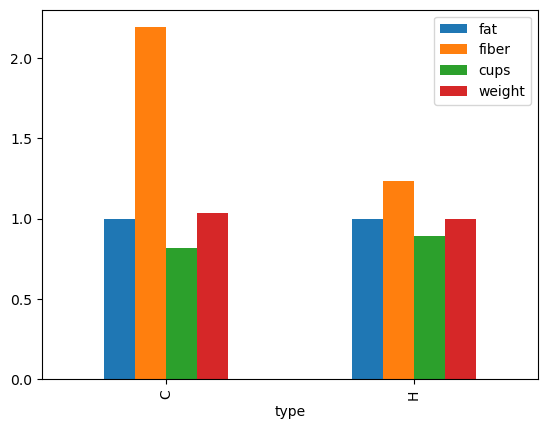

In [162]:
#The graph of the mean of ( 'fat', 'fiber', 'cups', 'weight') by 'type'.

Mntp = pd.pivot_table(df, values=['fat', 'fiber', 'cups', 'weight'],  index=['type']).reset_index()

#plt.figure(figsize=(8, 30))
Mntp.plot(x='type', y=['fat', 'fiber', 'cups', 'weight'], kind='bar')



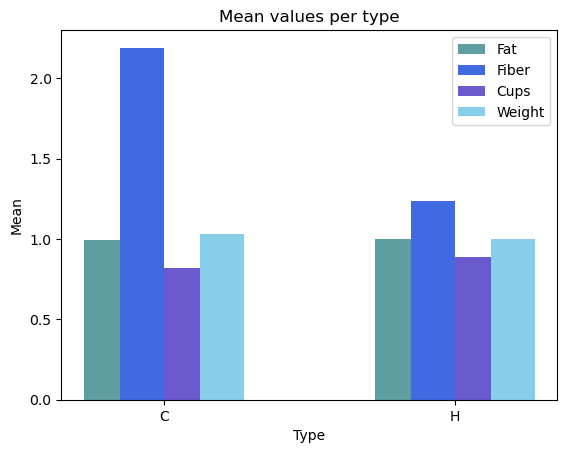

In [163]:
#The graph of the mean of ( 'fat', 'fiber', 'cups', 'weight') by 'type'.
bars = int(len(df.type.unique()))

df_means = df.groupby('type')[['fat', 'fiber', 'cups', 'weight']].agg('mean').reset_index()

plt.bar([x - 0.2 for x in range(bars)], df_means['fat'], color = 'cadetblue', width =  0.15, label = 'Fat')
plt.bar([x - 0.075 for x in range(bars)], df_means['fiber'], color = 'royalblue', width = 0.15, label = 'Fiber')
plt.bar([x + 0.075 for x in range(bars)], df_means['cups'], color = 'slateblue', width =  0.15, label = 'Cups')
plt.bar([x + 0.2 for x in range(bars)], df_means['weight'], color = 'skyblue', width = 0.15, label = 'Weight')

plt.xlabel('Type')
plt.ylabel('Mean')
plt.legend()
plt.title('Mean values per type')
plt.xticks(range(bars),df_means['type'])
plt.show()

In [164]:
#In Pie chart display the maximum of 'sugars ' per 'mfr',

Maxs = pd.pivot_table(df, values=['sugars'], index=['mfr'], aggfunc=np.max)
Maxs = Maxs.reset_index()
Maxs

,mfr,sugars
0,A,3.0
1,G,14.0
2,K,15.0
3,N,6.0
4,P,15.0
5,Q,12.0
6,R,11.0


<Axes: ylabel='sugars'>

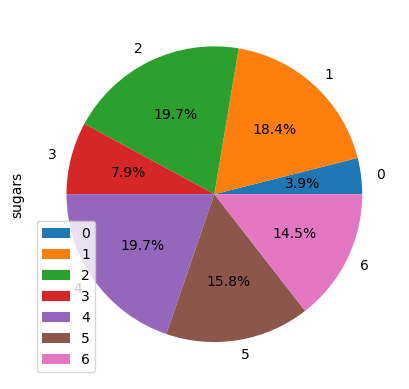

In [165]:
Maxs.plot(x='mfr', y='sugars', kind='pie', autopct='%1.1f%%')

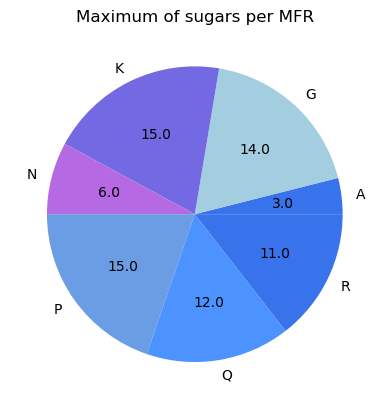

In [166]:
#In Pie chart display the maximum of 'sugars ' per 'mfr'
df_sugar = df.groupby('mfr')['sugars'].agg('max').reset_index()
labels = df_sugar['mfr']
sizes = df_sugar['sugars']


def value(val):
    x = np.round(val/100*df_sugar['sugars'].sum(), 3)
    return x

plt.pie(sizes, labels = labels, autopct = value, 
        colors = ['#3973EC', '#A3CEE0', '#736AE3', '#B56AE3', '#6A9DE3', '#4D93FF'])
plt.title('Maximum of sugars per MFR')
plt.show()

In [167]:
#Read the maximum of 'sugars ' of each ‘mfr and show it using the histogram to see most common ranges.
Maxs = pd.pivot_table(df, values=['sugars'], index=['mfr'], aggfunc=np.max)
Maxs = Maxs.reset_index()
Maxs

,mfr,sugars
0,A,3.0
1,G,14.0
2,K,15.0
3,N,6.0
4,P,15.0
5,Q,12.0
6,R,11.0


<Axes: xlabel='mfr'>

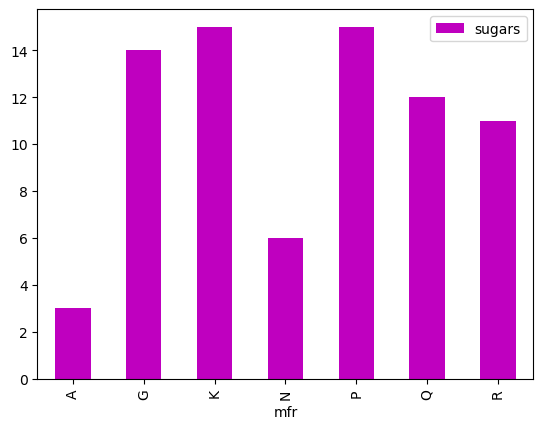

In [168]:
Maxs.plot(x='mfr', y='sugars', kind='bar', color='m')

In [169]:
df_sugar

,mfr,sugars
0,A,3.0
1,G,14.0
2,K,15.0
3,N,6.0
4,P,15.0
5,Q,12.0
6,R,11.0


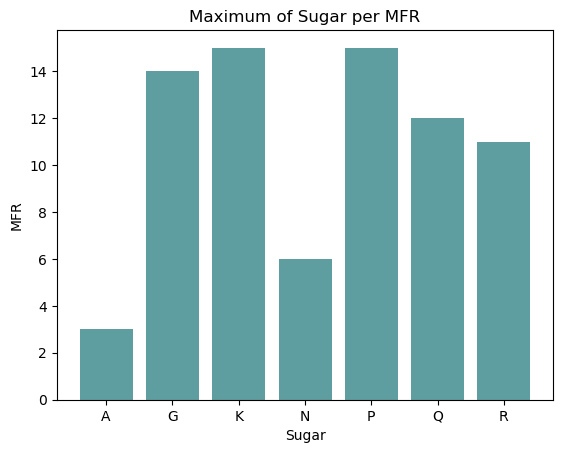

In [170]:
#Read the maximum of 'sugars ' of each ‘mfr and show it using the histogram to see most common ranges


plt.bar(Maxs['mfr'], Maxs['sugars'], color = 'cadetblue')
plt.title('Maximum of Sugar per MFR')
plt.xlabel('Sugar')
plt.ylabel('MFR')
plt.show()

In [171]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [172]:
#Question 3 Programming Algorithm challenges

In [173]:
df["Negative_nutrition"] = 1+df['sodium']+df['sugars']+df['fat']

In [174]:
df["Positive_nutrition"]= df['calories']+df['protein']+df['vitamins']

In [175]:
df["Global_nutrition_index"] = df["Positive_nutrition"]  /  df["Negative_nutrition"]

In [176]:
df['Nutrition_Category'] = np.where(   df['Global_nutrition_index'] > 2, 1, 
                           np.where(  (df['Global_nutrition_index'] > 0.5) 
                                 & (   df['Global_nutrition_index'] < 2), 2, 3))

In [177]:
List_of_Cereals_name_by_Nutrition_Category = pd.pivot_table(df, values=['Nutrition_Category'], index=['name'], aggfunc=np.sum)
List_of_Cereals_name_by_Nutrition_Category = List_of_Cereals_name_by_Nutrition_Category.reset_index()
List_of_Cereals_name_by_Nutrition_Category

,name,Nutrition_Category
0,100% Bran,2
1,100% Natural Bran,1
2,All-Bran,3
3,All-Bran with Extra Fiber,2
4,Almond Delight,2
...,...,...
72,Triples,2
73,Trix,2
74,Wheat Chex,2
75,Wheaties,2


In [178]:
#get positive nutrition index
df['Posi_Nut_Ind'] = df[['calories', 'protein', 'vitamins']].sum(axis = 1)
#get negative nutrition index
df['Neg_Nut_Ind'] = 1 + df[['sodium', 'sugars', 'fat']].sum(axis = 1)
#get global nutrition index
df['Glob_Nut_Ind'] = df['Posi_Nut_Ind']/df['Neg_Nut_Ind'] 
#check results
df[['name', 'Posi_Nut_Ind', 'Neg_Nut_Ind', 'Glob_Nut_Ind']].head()

,name,Posi_Nut_Ind,Neg_Nut_Ind,Glob_Nut_Ind
0,Corn Chex,137.0,284.0,0.482394
1,Corn Flakes,127.0,293.0,0.433447
2,Rice Krispies,137.0,294.0,0.465986
3,Special K,141.0,234.0,0.602564
4,Multi-Grain Cheerios,127.0,228.0,0.557018


In [179]:
conditions = [df['Glob_Nut_Ind'] > 2,
             (df['Glob_Nut_Ind'] < 2) & (df['Glob_Nut_Ind'] > 0.5),
              df['Glob_Nut_Ind'] < 0.5]
values = [1, 2, 3]

df['Nut_category'] = np.select(conditions, values)
df[['name', 'Posi_Nut_Ind', 'Neg_Nut_Ind', 'Glob_Nut_Ind', 'Nut_category']].head()


,name,Posi_Nut_Ind,Neg_Nut_Ind,Glob_Nut_Ind,Nut_category
0,Corn Chex,137.0,284.0,0.482394,3
1,Corn Flakes,127.0,293.0,0.433447,3
2,Rice Krispies,137.0,294.0,0.465986,3
3,Special K,141.0,234.0,0.602564,2
4,Multi-Grain Cheerios,127.0,228.0,0.557018,2


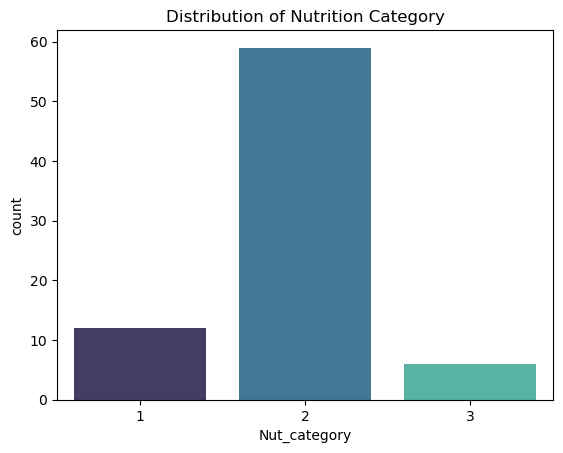

In [180]:
import seaborn as sns
sns.countplot(data = df, x = 'Nut_category', palette = 'mako')
plt.title('Distribution of Nutrition Category')
plt.show()

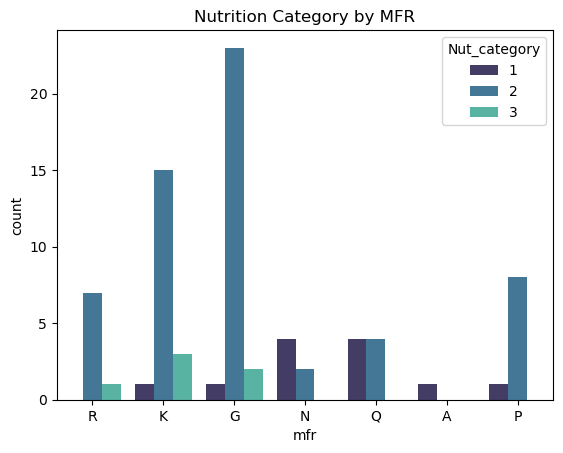

In [181]:
sns.countplot(data = df, x = 'mfr', hue = 'Nut_category', palette = 'mako')
plt.title('Nutrition Category by MFR')
plt.show()

In [182]:
# Question 4 Machine Learning

In [183]:
#Import librairies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [184]:
ndf= pd.read_excel("New_Cereal_List.xlsx")
ndf

,Name,calories,protein,fat,fiber,carbo,sugars,potass,shelf
0,Azer_Food_X01,120,1,2,1,12,11,45,2
1,Azer_Food_X02,110,1,0,1,13,12,20,2
2,Azer_Food_X03,110,1,1,0,13,12,25,2
3,Azer_Food_X04,110,1,1,0,12,13,55,2
4,Azer_Food_X05,110,1,1,0,12,13,65,2
5,Azer_Food_X06,50,1,0,0,13,0,15,3
6,Azer_Food_X07,110,2,0,0,22,3,25,1
7,Azer_Food_X08,110,2,0,0,22,3,35,1
8,Azer_Food_X09,110,2,1,1,11,13,30,2
9,Azer_Food_X10,110,2,1,0,12,12,55,2


In [185]:
ndf.isnull().sum()

Name        0
calories    0
protein     0
fat         0
fiber       0
carbo       0
sugars      0
potass      0
shelf       0
dtype: int64

In [186]:
ndf.shape

(20, 9)

In [187]:
ndf.dtypes

Name        object
calories     int64
protein      int64
fat          int64
fiber        int64
carbo        int64
sugars       int64
potass       int64
shelf        int64
dtype: object

In [188]:
df= df

In [189]:
# Question 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
df_new = pd.read_excel('New_Cereal_List.xlsx')
X_pred = df_new[['calories','protein','fat','fiber','carbo','sugars','potass','shelf']]

X_train = df[['calories','protein','fat','fiber','carbo','sugars','potass','shelf']]
X_train = X_train.fillna(0)

Y_train = df['Nut_category']
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state =0)
model = RandomForestClassifier(n_estimators=60, random_state=40)

#fit data
model.fit(X_train, Y_train)

#Predict our dataset
Y_pred_test = model.predict(X_test)
print(Y_pred_test)
len(Y_pred_test)


[2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 2]


16

In [190]:
df_new

,Name,calories,protein,fat,fiber,carbo,sugars,potass,shelf
0,Azer_Food_X01,120,1,2,1,12,11,45,2
1,Azer_Food_X02,110,1,0,1,13,12,20,2
2,Azer_Food_X03,110,1,1,0,13,12,25,2
3,Azer_Food_X04,110,1,1,0,12,13,55,2
4,Azer_Food_X05,110,1,1,0,12,13,65,2
5,Azer_Food_X06,50,1,0,0,13,0,15,3
6,Azer_Food_X07,110,2,0,0,22,3,25,1
7,Azer_Food_X08,110,2,0,0,22,3,35,1
8,Azer_Food_X09,110,2,1,1,11,13,30,2
9,Azer_Food_X10,110,2,1,0,12,12,55,2


In [191]:
#find our prediction accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test, Y_pred_test))

#find what parameters or features occurs in our model
#features_list = list(X.columns)
#feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False) 
#print(feature_imp)

Accuracy =  0.8125


<Axes: xlabel='Predicted', ylabel='Actual'>

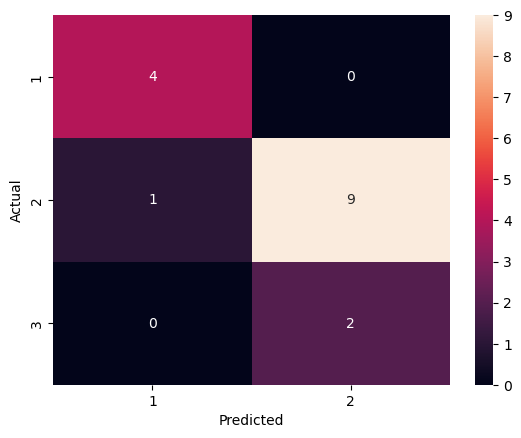

In [192]:
import seaborn as sn
confusion_matrix = pd.crosstab(Y_test, Y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [193]:
Y_pred = model.predict(X_pred)
result = pd.concat([df_new,pd.Series(Y_pred,name='Nutrition_Category_Pred')],axis=1)
result

,Name,calories,protein,fat,fiber,carbo,sugars,potass,shelf,Nutrition_Category_Pred
0,Azer_Food_X01,120,1,2,1,12,11,45,2,2
1,Azer_Food_X02,110,1,0,1,13,12,20,2,2
2,Azer_Food_X03,110,1,1,0,13,12,25,2,2
3,Azer_Food_X04,110,1,1,0,12,13,55,2,2
4,Azer_Food_X05,110,1,1,0,12,13,65,2,2
5,Azer_Food_X06,50,1,0,0,13,0,15,3,1
6,Azer_Food_X07,110,2,0,0,22,3,25,1,3
7,Azer_Food_X08,110,2,0,0,22,3,35,1,3
8,Azer_Food_X09,110,2,1,1,11,13,30,2,2
9,Azer_Food_X10,110,2,1,0,12,12,55,2,2
